In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pywt

In [2]:
def imshow(*args, figsize=10, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    if title is not None:
        assert len(title) == len(images), "Please provide a title for each image."
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        plt.imshow(images[i-1], cmap='gray')
        plt.axis('off')
    plt.show()

In [3]:
img = cv2.imread("Images/5/mona lisa.jpg", cv2.IMREAD_GRAYSCALE)

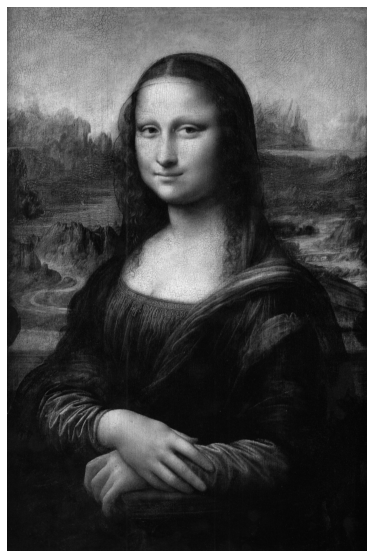

In [4]:
imshow(img)

## 5.1.1

In [5]:
def gaussian_pyramid(img, num_levels):
    lower = img.copy()
    gaussian_pyr = [lower]
    for i in range(num_levels):
        lower = cv2.pyrDown(lower)
        gaussian_pyr.append(np.float32(lower))
    return gaussian_pyr

In [6]:
def laplacian_pyramid(gaussian_pyr):
    laplacian_top = gaussian_pyr[-1]
    num_levels = len(gaussian_pyr) - 1
    
    laplacian_pyr = [laplacian_top]
    for i in range(num_levels,0,-1):
        size = (gaussian_pyr[i - 1].shape[1], gaussian_pyr[i - 1].shape[0])
        gaussian_expanded = cv2.pyrUp(gaussian_pyr[i], dstsize=size)
        laplacian = np.subtract(gaussian_pyr[i-1], gaussian_expanded)
        laplacian_pyr.append(laplacian)
    return laplacian_pyr

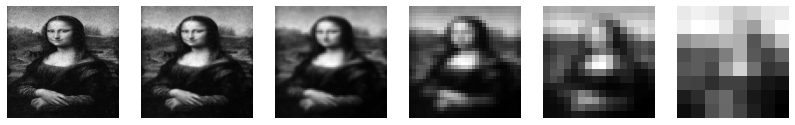

In [7]:
img = cv2.resize(img, (256, 256)) 

g_pyramid = gaussian_pyramid(img, 5)
imshow(g_pyramid, figsize=14)

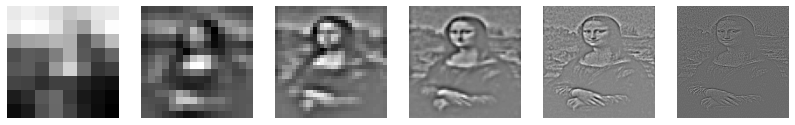

In [8]:
l_pyramid = laplacian_pyramid(g_pyramid)
imshow(l_pyramid, figsize=14)

## 5.1.3

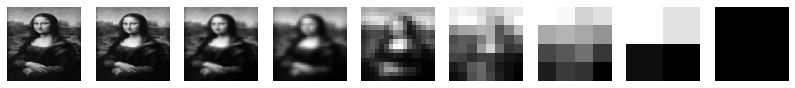

In [9]:
g_pyramid = gaussian_pyramid(img, 8)
imshow(g_pyramid, figsize=14)

In [10]:
print(img.shape)
g_pyramid[8].shape

(256, 256)


(1, 1)

## 5.1.4

In [11]:
img = cv2.imread("Images/5/Lena.bmp", cv2.IMREAD_GRAYSCALE)

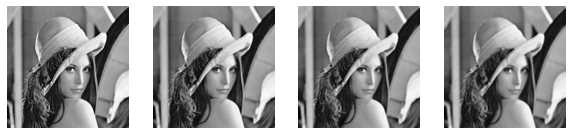

In [12]:
img = cv2.resize(img, (256, 256)) 
kernel = np.ones((2,2),np.float32)/4
dst1 = cv2.filter2D(img,-1,kernel)
dst2 = cv2.filter2D(dst1,-1,kernel)
dst = cv2.filter2D(dst2,-1,kernel)

imshow(img, dst1,dst2,dst)

## 5.1.5

In [13]:
img = cv2.imread("Images/5/Lena.bmp", cv2.IMREAD_GRAYSCALE)

In [14]:
def normalize(a):
    if isinstance(a, list):
        return list(map(normalize, a))
    if isinstance(a, tuple):
        return tuple(normalize(list(a)))
    return ((a - a.min()) / (a.max() - a.min())) * 255

In [15]:
# wavelet transform
coeffs = pywt.wavedec2(img, 'haar', mode='periodization', level=3)
coeffs = normalize(coeffs)

# Put coefficients in a matrix
c_matrix, c_slices = pywt.coeffs_to_array(coeffs)

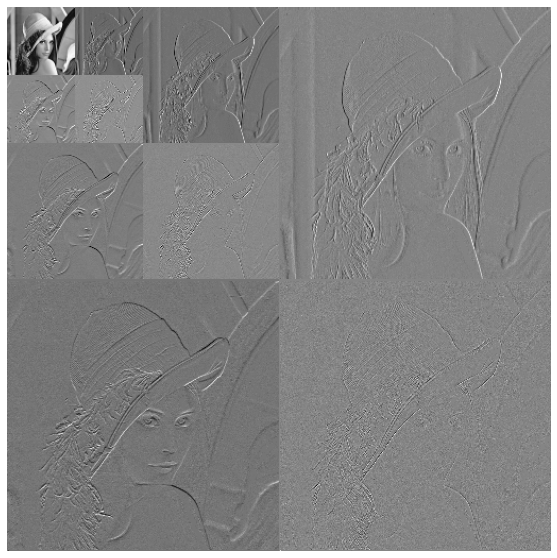

In [16]:
imshow(c_matrix)

## 5.1.6 

In [17]:
def psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [18]:
def quantize_simulation(image, n_bits):
    coeff = 2**8 // 2**n_bits
    return (image // coeff) * coeff

In [19]:
quan = quantize_simulation(coeffs,2)
img_i = pywt.idwt2(quan, 'haar', mode='periodization')
img_i = img_i.astype('uint8')
imshow(img_i)

TypeError: unsupported operand type(s) for //: 'list' and 'int'

In [20]:
psnr(img, img_i)

NameError: name 'img_i' is not defined